In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.spatial import distance
import matplotlib.pyplot as plt
import os

## Exercise 0: Dataset Preprocessing

### Preprocess Dataset

In [55]:
def preprocess_data(test, train, miss_val_flag):
    '''
    returns pre-processed train, test and validation sets
    merges test and train, pads unequal samples, normalizes the data and then re-splits into train, test and validation
    '''
    ## Merge test and train
    data = test.append(train)
    
    ## Pad datasets with unequal length samples (not with missing values)
    if not miss_val_flag:
        np_arr = data.values
        max_len = 0
        ## Find the max length of non-null samples
        for row in np_arr:
            row = [elem for elem in row if not pd.isnull(elem)]
            max_len = max(max_len, len(row))

        
        ## Create numpy array of new size
        m,n = np_arr.shape
        np_arr_new = np.zeros((m,max_len))

        ## pad zeros on the left to make equal length samples
        for i in range(len(np_arr)):
            row = np_arr[i]
            row = [elem for elem in row if not pd.isnull(elem)]
            diff = max_len - len(row)
            row = np.insert(row, 1, np.zeros(diff))
            np_arr_new[i] = row

        data = pd.DataFrame(np_arr_new)
    
    ## Remove samples which belong to minority classes -- helpful in stratified splitting
    
    num_classes = len(pd.unique(data[0]))

    for i in range(1, num_classes+1):
        if len(data.loc[data[0] == i])< 5:
            data.drop(data.loc[data[0] == i].index, inplace=True, axis=0)
                
    ## Standardize the dataset, all columns except target column
    data.iloc[:, 1:] = StandardScaler().fit_transform(data.iloc[:, 1:])
    data[0].apply(pd.to_numeric, errors='coerce')
    
    ## Stratified splits into train, test and valid (70%,15%,15%)
    
    try:
        train, test_valid = train_test_split(data,stratify=data[0], test_size=0.3)
        test, valid = train_test_split(test_valid,stratify=test_valid[0], test_size=0.5)
    except:
        print("returns None where stratified sampling throws exception")
        return (None, None, None)
      
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    valid.reset_index(drop=True, inplace=True)
    return (train, test, valid)

### The datasets which have missing values and unequal length samples

In [56]:
## List of datasets having missing values
miss_val_data = ['UCR/DodgerLoopDay', 'UCR/DodgerLoopWeekend','UCR/DodgerLoopGame','UCR/MelbournePedestrian']
path = 'UCR/'
print("The datasets which have missing values and unequal length samples-----")

for data_dir in os.listdir(path):
    sub_path = os.path.join(path,data_dir)
    for data_file in os.listdir(sub_path):
        file = os.path.join(sub_path,data_file)
        
        
        if file.endswith("_TEST.tsv"):
            test = pd.read_csv(file, sep='\t', header=None)
        if file.endswith("_TRAIN.tsv"):
            train = pd.read_csv(file, sep='\t', header=None)
    
    ## Print datasets with missing values and unequal length samples
    data = test.append(train)
    
    if data.isnull().any(axis=0).sum():
        print(sub_path)
    
    miss_val_flag = 0
    if sub_path in miss_val_data:
        miss_val_flag = 1
    
    (train_set, test_set, valid_set) = preprocess_data(test, train, miss_val_flag)    

The datasets which have missing values and unequal length samples-----
UCR/GestureMidAirD2
UCR/PLAID
UCR/DodgerLoopDay
UCR/ShakeGestureWiimoteZ
UCR/DodgerLoopWeekend
returns None where stratified sampling throws exception
UCR/MelbournePedestrian
UCR/AllGestureWiimoteX
UCR/AllGestureWiimoteZ
UCR/AllGestureWiimoteY
UCR/PickupGestureWiimoteZ
UCR/GesturePebbleZ2
UCR/GesturePebbleZ1
UCR/GestureMidAirD3
returns None where stratified sampling throws exception
UCR/DodgerLoopGame
returns None where stratified sampling throws exception
UCR/GestureMidAirD1


### Plot interesting statistics

### Plot indicating the total length of samples

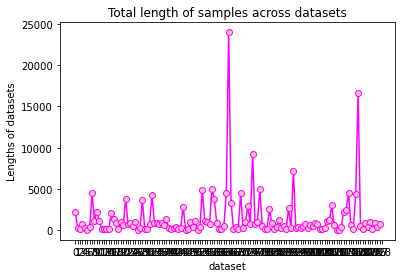

In [86]:
path = 'UCR/'

lengths = []

for data_dir in os.listdir(path):
    sub_path = os.path.join(path,data_dir)
    for data_file in os.listdir(sub_path):
        file = os.path.join(sub_path,data_file)
        
        
        if file.endswith("_TEST.tsv"):
            test = pd.read_csv(file, sep='\t', header=None)
        if file.endswith("_TRAIN.tsv"):
            train = pd.read_csv(file, sep='\t', header=None)
    
    ## Print datasets with missing values and unequal length samples
    data = test.append(train)
    lengths.append(data.shape[0])

plt.plot(lengths, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(lengths)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Lengths of datasets') #set the label for y axis
plt.xlabel('dataset') #set the label for x-axis
plt.title("Total length of samples across datasets") #set the title of the graph
plt.show() #display the graph


### Length of samples in each class

<ipython-input-97-c9bc2b26f88d>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


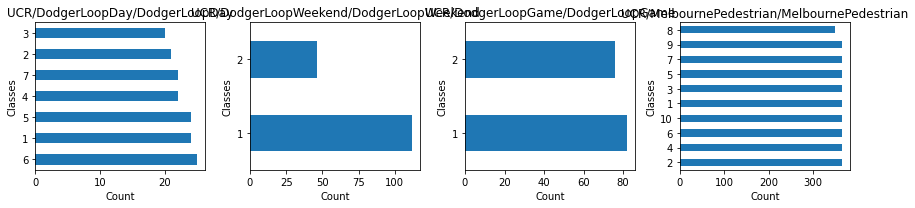

In [97]:
miss_val_data = ['UCR/DodgerLoopDay/DodgerLoopDay', 'UCR/DodgerLoopWeekend/DodgerLoopWeekend',
                 'UCR/DodgerLoopGame/DodgerLoopGame','UCR/MelbournePedestrian/MelbournePedestrian']

fig, axes = plt.subplots(1,4, figsize=(12,3))
i=0
for dataset in miss_val_data:    
    test = pd.read_csv(dataset+"_TEST.tsv", sep='\t', header=None)
    train = pd.read_csv(dataset+"_TRAIN.tsv", sep='\t', header=None)

    data = test.append(train)
    
    data[0].value_counts().plot(kind='barh',
                                   ax=axes[i])
    
    axes[i].set_title('{}'.format(dataset))
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Classes')
    i = i+1
fig.tight_layout()
fig.show()

---

## Exercise 1: Dataset imputation with KNN

**Pseudo-code for dataset imputation with KNN**
1. K1 - denotes number of neighbours used to impute missing values. K1 = [2,4,6,8,10]
2. K2 - denotes number neighbours used in KNN classifier. K2 - [3,5,7,9]
3. For a missing value in dataset, replace it with average of K1 numbers (these K1 values are chosen from that same column). If any of these K1 neighbours is NaN, then a nearest non-null neighbour is chosen.
4. For each K2, impute missing values for each K1. This is grid search. Best values of K1 and K2 is chosen based on accuracy metric.
5. **NOTE** : **sklearn's KNN classifier is used only to find best K for imputation.**

In [57]:
K1 = [2,4,6,8,10] # For imputation
K2 = [3,5,7,9] # For classifier

def impute_missing(train_X, k1):
    '''
    Imputes missing values with k1 neighbours
    '''
    m,n = train_X.shape
    
    for col_index in range(n):
        # Get each column data
        columnData = train_X.iloc[:, col_index].values
        # Find indices where value is nan
        nan_indices = np.argwhere(np.isnan(columnData))


        # Now for each row (where nan is present)
        for row_index in nan_indices:
            row_index = row_index[0]

            k_val = k1
            temp_sum = 0
            i = row_index
            j = col_index
            k = 1
            while(k_val > 0):
                if ((i-k >= 0) and not(pd.isnull(train_X.iloc[i-k,j]))):
                    temp_sum = temp_sum + train_X.iloc[i-k,j]
                    k_val = k_val - 1
                if ((i+k < m) and not(pd.isnull(train_X.iloc[i+k,j] ))):
                    temp_sum = temp_sum + train_X.iloc[i+k,j]
                    k_val = k_val - 1

                k = k+1
            
            # replace nan by average of k1 neighbours
            train_X.iloc[row_index, col_index] = (temp_sum/k1)
                   
    return train_X
            

def classify(train_X, train_Y, valid_X, valid_Y):
    '''
    Use of grid search to find best K for imputation
    Implementation of KNN classifier (KNN classifier also runs for different values of K)
    '''
    results = []
    for k2 in K2:
        acc_scores = ["Accuracy scores for knn classifier: K = "+str(k2)]
        for k1 in K1:
            train_X = impute_missing(train_X, k1)
        
            # Now train a knn classifier with train set
            knn_model = KNeighborsClassifier(n_neighbors=k2)
            train_Y = np.ravel(train_Y, order='C')
            knn_model.fit(train_X, train_Y)
            
            # Fill NaN values in valid set also
            valid_X = impute_missing(valid_X, k1)
            
            # Validate model on validation set
            valid_pred = knn_model.predict(valid_X)
            
            # Save accuracy metric
            valid_Y = np.ravel(valid_Y, order='C')
            accuracy = metrics.accuracy_score(valid_Y, valid_pred)
            #score = precision_recall_fscore_support(valid_Y, valid_pred, average='weighted')
            
            acc_scores.append(round(accuracy,3))
        results.append(acc_scores)
    
    print(results)
    return

**The following four datasets have missing values**.
The accuracy values for different values of K are shown below

In [58]:
## Driver code for imputation with KNN

miss_val_data = ['UCR/DodgerLoopDay/DodgerLoopDay', 'UCR/DodgerLoopWeekend/DodgerLoopWeekend',
                 'UCR/DodgerLoopGame/DodgerLoopGame','UCR/MelbournePedestrian/MelbournePedestrian']

for dataset in miss_val_data:    
    test = pd.read_csv(dataset+"_TEST.tsv", sep='\t', header=None)
    train = pd.read_csv(dataset+"_TRAIN.tsv", sep='\t', header=None)
    
    (train_set, test_set, valid_set) = preprocess_data(test, train, 1)

    train_Y = train_set.loc[:,[0]]
    train_X = train_set.drop(columns = [0])
    
    valid_Y = valid_set.loc[:,[0]]
    valid_X = valid_set.drop(columns = [0])
    print("-------------------------------------------")
    classify(train_X, train_Y, valid_X, valid_Y)

-------------------------------------------
[['Accuracy scores for knn classifier: K = 3', 0.5, 0.5, 0.5, 0.5, 0.5], ['Accuracy scores for knn classifier: K = 5', 0.5, 0.5, 0.5, 0.5, 0.5], ['Accuracy scores for knn classifier: K = 7', 0.458, 0.458, 0.458, 0.458, 0.458], ['Accuracy scores for knn classifier: K = 9', 0.417, 0.417, 0.417, 0.417, 0.417]]
-------------------------------------------
[['Accuracy scores for knn classifier: K = 3', 1.0, 1.0, 1.0, 1.0, 1.0], ['Accuracy scores for knn classifier: K = 5', 1.0, 1.0, 1.0, 1.0, 1.0], ['Accuracy scores for knn classifier: K = 7', 1.0, 1.0, 1.0, 1.0, 1.0], ['Accuracy scores for knn classifier: K = 9', 1.0, 1.0, 1.0, 1.0, 1.0]]
-------------------------------------------
[['Accuracy scores for knn classifier: K = 3', 0.75, 0.75, 0.75, 0.75, 0.75], ['Accuracy scores for knn classifier: K = 5', 0.792, 0.792, 0.792, 0.792, 0.792], ['Accuracy scores for knn classifier: K = 7', 0.708, 0.708, 0.708, 0.708, 0.708], ['Accuracy scores for knn cl

The four different KNN classifiers (for K2 = [3,5,7,9]) are trained for every different imputation (K1 = [2,4,6,8,10]).
**FINDINGS -- The Accuracy metric is same for all values of K1 = [2,4,6,8,10]**.
**FINDINGS -- Best value of K2 is 5.**

### Implementation of KNN classifier and training classifier with best set of K

In [67]:
## Train classifier on train set and test on test set
def euclidean_distance(row1, row2, n):
    '''
    Finds Euclidean distance between two samples
    '''
    distance = 0.0
    for i in range(n):
        distance += ((row1.iloc[i] - row2.iloc[i]) ** 2)

    return np.sqrt(distance)


def get_k_nearest_rows(train_X, sample_row, K, n):
    '''
    Returns indices of K nearest neighbours for the given sample
    '''
    # Stores row index and its distance from sample_row
    distances = list()

    # Calculate distance of sample_row with training set
    for i in range(len(train_X)): 
        dist = euclidean_distance(sample_row, train_X.iloc[i], n)
        # Append row index & distance
        distances.append((i, dist))

    # Sort tuple in ascending order 
    # We need rows with minimum distance sample row
    distances.sort(key=lambda tup: tup[1])

    neighbors_idx = []

    for ind, tup in enumerate(distances):
        if K == ind:
            break

        neighbors_idx.append(tup[0])

    # Return K-closest rows  
    return neighbors_idx[:K]

def knn_classifier(train_X, train_Y, test_X, test_Y, K):
    '''
    Implementation of KNN classifier with Euclidean distance and majority voting
    '''
    preds = []
    m,n = train_X.shape
    for i in range(len(test_X)):
        # Get the K nearest neighbours to this sample
        neigh_indices = get_k_nearest_rows(train_X, test_X.iloc[i], K, n)
        neigh_classes = train_Y.iloc[neigh_indices].values
        neigh_classes = [elem[0] for elem in neigh_classes]
        
        counts = np.bincount(neigh_classes)
        # majority voting - assign class which is found frequently in the neighbours
        pred_y = np.argmax(counts)
        preds.append(pred_y)
    
    preds = np.array(preds)
    
    # Save accuracy metric
    test_Y = np.ravel(test_Y, order='C')
    accuracy = metrics.accuracy_score(test_Y, preds)
    
    print("Test Accuracy :", accuracy)
    
    return accuracy

**Test accuracies reported with K1=4 and K2=5 on all four datasets (datasets which have missing values)**

In [61]:
# Driver code for KNN
K=5 # Best K2=5 chosen

miss_val_data = ['UCR/DodgerLoopDay/DodgerLoopDay', 'UCR/DodgerLoopWeekend/DodgerLoopWeekend',
                 'UCR/DodgerLoopGame/DodgerLoopGame','UCR/MelbournePedestrian/MelbournePedestrian']

for dataset in miss_val_data:    
    test = pd.read_csv(dataset+"_TEST.tsv", sep='\t', header=None)
    train = pd.read_csv(dataset+"_TRAIN.tsv", sep='\t', header=None)
    
    (train_set, test_set, valid_set) = preprocess_data(test, train, 1)

    train_Y = train_set.loc[:,[0]]
    train_X = train_set.drop(columns = [0])
    
    test_Y = test_set.loc[:,[0]]
    test_X = test_set.drop(columns = [0])
    
    
    train_X = impute_missing(train_X, 4) ## K1=4 chosen
    test_X = impute_missing(test_X, 4) ## K1=4 chosen
    
    print(dataset)
    
    print("K = ", K)
    accuracy = knn_classifier(train_X, train_Y, test_X, test_Y, K)

UCR/DodgerLoopDay/DodgerLoopDay
K =  5
Test Accuracy : 0.5416666666666666
UCR/DodgerLoopWeekend/DodgerLoopWeekend
K =  5
Test Accuracy : 1.0
UCR/DodgerLoopGame/DodgerLoopGame
K =  5
Test Accuracy : 0.875
UCR/MelbournePedestrian/MelbournePedestrian
K =  5
Test Accuracy : 0.963302752293578


---

## Exercise 2 : Time Series Classification with Various Distance Measures

In [94]:
def distance_measure(measure_ind, row1, row2):
    '''
    Different distance measures, returns distance based on measure_index
    '''
    if measure_ind==0:
        return distance.braycurtis(row1, row2)
    elif measure_ind==1:
        return distance.canberra(row1, row2)
    elif measure_ind==2:
        return distance.chebyshev(row1, row2)
    elif measure_ind==3:
        return distance.cityblock(row1, row2)
    elif measure_ind==4:
        return distance.correlation(row1, row2)
    elif measure_ind==5:
        return distance.cosine(row1, row2)
    elif measure_ind==6:
        return distance.dice(row1, row2)
    elif measure_ind==7:
        return distance.euclidean(row1, row2)
    elif measure_ind==8:
        return distance.hamming(row1, row2)
    elif measure_ind==9:
        return distance.jaccard(row1, row2)
    elif measure_ind==10:
        return distance.jensenshannon(row1, row2)
    elif measure_ind==11:
        return distance.kulsinski(row1, row2)
    elif measure_ind==12:
        return distance.matching(row1, row2)
    elif measure_ind==13:
        return distance.minkowski(row1, row2)
    elif measure_ind==14:
        return distance.rogerstanimoto(row1, row2)
    elif measure_ind==15:
        return distance.russellrao(row1, row2)
    elif measure_ind==16:
        return distance.sokalmichener(row1, row2)
    elif measure_ind==17:
        return distance.sokalsneath(row1, row2)
    elif measure_ind==18:
        return distance.sqeuclidean(row1, row2)

In [95]:
def get_k_nearest_rows(train_X, sample_row, K, ind):
    '''
    Returns indices of K nearest neighbours for the given sample
    '''
    # Stores row index and its distance from sample_row
    distances = list()

    # Calculate distance of sample_row with training set
    for i in range(len(train_X)): 
        dist = distance_measure(ind, sample_row, train_X.iloc[i])
        # Append row index & distance
        distances.append((i, dist))

    # Sort tuple in ascending order 
    # We need rows with minimum distance sample row
    distances.sort(key=lambda tup: tup[1])

    neighbors_idx = []

    for ind, tup in enumerate(distances):
        if K == ind:
            break

        neighbors_idx.append(tup[0])

    # Return K-closest rows  
    return neighbors_idx[:K]

def KNN(train_X, train_Y, valid_X, valid_Y, K, ind):
    '''
    Implementation of KNN classifier
    '''
    preds = []
    m,n = train_X.shape
    for i in range(len(valid_X)):
        # Get the K nearest neighbours to this sample
        neigh_indices = get_k_nearest_rows(train_X, valid_X.iloc[i], K, ind)
        neigh_classes = train_Y.iloc[neigh_indices].values
        neigh_classes = [elem[0] for elem in neigh_classes]
        
        counts = np.bincount(neigh_classes)
        # majority voting - assign class which is found frequently in the neighbours
        pred_y = np.argmax(counts)
        preds.append(pred_y)
    
    preds = np.array(preds)
    
    # Save accuracy metric
    valid_Y = np.ravel(valid_Y, order='C')
    accuracy = metrics.accuracy_score(valid_Y, preds)
    
    print("Test Accuracy :", accuracy)
    
    return accuracy

In [96]:
distance_measures = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 
                     'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 
                     'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 
                     'sokalsneath', 'sqeuclidean']

datasets = ['UCR/Herring/Herring','UCR/Lightning7/Lightning7', 'UCR/Wine/Wine']

for dataset in datasets:         
    if dataset.endswith("_TEST.tsv"):
        test = pd.read_csv(file, sep='\t', header=None)
    if dataset.endswith("_TRAIN.tsv"):
        train = pd.read_csv(file, sep='\t', header=None)
    
    (train_set, test_set, valid_set) = preprocess_data(test, train, 0)    
    
    train_Y = train_set.loc[:,[0]]
    train_X = train_set.drop(columns = [0])
    
    test_Y = test_set.loc[:,[0]]
    test_X = test_set.drop(columns = [0])
    
    
    #train_X = impute_missing(train_X, 4) ## K1=4 chosen
    #test_X = impute_missing(test_X, 4) ## K1=4 chosen
    
    print(dataset)
    
    K = 5
    for ind in range(len(distance_measures)):
        print(distance_measures[ind])
        accuracy = KNN(train_X, train_Y, test_X, test_Y, K, ind)

UCR/Herring/Herring
braycurtis
Test Accuracy : 0.625
canberra
Test Accuracy : 0.6160714285714286
chebyshev
Test Accuracy : 0.3482142857142857
cityblock
Test Accuracy : 0.5982142857142857
correlation
Test Accuracy : 0.5178571428571429
cosine
Test Accuracy : 0.5178571428571429
dice
Test Accuracy : 0.25
euclidean
Test Accuracy : 0.36607142857142855
hamming
Test Accuracy : 0.3392857142857143
jaccard
Test Accuracy : 0.3392857142857143
jensenshannon
Test Accuracy : 0.3392857142857143
kulsinski
Test Accuracy : 0.5
matching


<ipython-input-94-617c81c27008>:30: DeprecationWarning:     `matching` is deprecated!
    spatial.distance.matching is deprecated in scipy 1.0.0; use spatial.distance.hamming instead.
  return distance.matching(row1, row2)


Test Accuracy : 0.3392857142857143
minkowski
Test Accuracy : 0.36607142857142855
rogerstanimoto
Test Accuracy : 0.49107142857142855
russellrao
Test Accuracy : 0.5178571428571429
sokalmichener
Test Accuracy : 0.49107142857142855
sokalsneath
Test Accuracy : 0.20535714285714285
sqeuclidean
Test Accuracy : 0.36607142857142855
UCR/Lightning7/Lightning7
braycurtis
Test Accuracy : 0.5714285714285714
canberra
Test Accuracy : 0.5535714285714286
chebyshev
Test Accuracy : 0.2857142857142857
cityblock
Test Accuracy : 0.5803571428571429
correlation
Test Accuracy : 0.39285714285714285
cosine
Test Accuracy : 0.39285714285714285
dice
Test Accuracy : 0.2767857142857143
euclidean
Test Accuracy : 0.41964285714285715
hamming
Test Accuracy : 0.3392857142857143
jaccard
Test Accuracy : 0.3392857142857143
jensenshannon
Test Accuracy : 0.3392857142857143
kulsinski
Test Accuracy : 0.39285714285714285
matching


<ipython-input-94-617c81c27008>:30: DeprecationWarning:     `matching` is deprecated!
    spatial.distance.matching is deprecated in scipy 1.0.0; use spatial.distance.hamming instead.
  return distance.matching(row1, row2)


Test Accuracy : 0.3392857142857143
minkowski
Test Accuracy : 0.41964285714285715
rogerstanimoto
Test Accuracy : 0.39285714285714285
russellrao
Test Accuracy : 0.4017857142857143
sokalmichener
Test Accuracy : 0.39285714285714285
sokalsneath
Test Accuracy : 0.29464285714285715
sqeuclidean
Test Accuracy : 0.41964285714285715
UCR/Wine/Wine
braycurtis
Test Accuracy : 0.6339285714285714
canberra
Test Accuracy : 0.6071428571428571
chebyshev
Test Accuracy : 0.33035714285714285
cityblock
Test Accuracy : 0.5892857142857143
correlation
Test Accuracy : 0.4642857142857143
cosine
Test Accuracy : 0.4642857142857143
dice
Test Accuracy : 0.23214285714285715
euclidean
Test Accuracy : 0.38392857142857145
hamming
Test Accuracy : 0.3392857142857143
jaccard
Test Accuracy : 0.3392857142857143
jensenshannon
Test Accuracy : 0.3392857142857143
kulsinski
Test Accuracy : 0.42857142857142855
matching


<ipython-input-94-617c81c27008>:30: DeprecationWarning:     `matching` is deprecated!
    spatial.distance.matching is deprecated in scipy 1.0.0; use spatial.distance.hamming instead.
  return distance.matching(row1, row2)


Test Accuracy : 0.3392857142857143
minkowski
Test Accuracy : 0.38392857142857145
rogerstanimoto
Test Accuracy : 0.4375
russellrao
Test Accuracy : 0.44642857142857145
sokalmichener
Test Accuracy : 0.4375
sokalsneath
Test Accuracy : 0.22321428571428573
sqeuclidean
Test Accuracy : 0.38392857142857145


### Best distance measures for following datasets:

| Distance measure/ Dataset | Herring | Lightning7 | Wine |
| --- | --- | --- | --- |
| Best Distance measure found| braycurtis | cityblock | braycurtis |

---

## Exercise 3: Accelerating K-Nearest Neighbour Classifier
### Implementation of two speedup strategies

### 1. Implementation of Partial Distances/ Lower Bounding

In [26]:
## Train classifier on train set and test on test set
def euclidean_distance(row1, row2, n):
    '''
    Finds Euclidean distance between two samples
    '''
    distance = 0.0
    for i in range(n):
        distance += ((row1.iloc[i] - row2.iloc[i]) ** 2)

    return (distance)


def get_k_nearest_rows(train_X, sample_row, K, M,N):
    '''
    Returns indices of K nearest neighbours for the given sample
    '''
    # Stores row index and its distance from sample_row
    K_distances = list()

    # Calculate distance of sample_row with any K instances in training data
    for j in range(K): 
        dist = euclidean_distance(sample_row, train_X.iloc[j], N)
        # Append row index & distance
        K_distances.append((j, dist))

    # Sort tuple in ascending order 
    K_distances.sort(key=lambda tup: tup[1])
    

    # Now for remaining training instances, we will compute partial distance and discard the point if it exceeds the
    # distance than the last point in K_distances
    for j in range(K, M):
        K_last_dist = K_distances[-1][1]
        d = 0
        n=0
        
        while n<N and d<K_last_dist:
            d += ((sample_row.iloc[n] - train_X.iloc[j, n]) ** 2)
            n = n+1
        if d<K_last_dist:
            K_distances.append((j, d))
            K_distances.sort(key=lambda tup: tup[1])
            K_distances = K_distances[:K]        
    
    neighbors_idx = []

    for ind, tup in enumerate(K_distances):
        if K == ind:
            break

        neighbors_idx.append(tup[0])

    # Return K-closest rows  
    return neighbors_idx[:K]

def knn_lower_bound(train_X, train_Y, test_X, test_Y, K):
    '''
    Implementation of KNN classifier with lower bound
    '''
    preds = []
    M,N = train_X.shape
    for i in range(len(test_X)):
        # Get the K nearest neighbours to this sample
        neigh_indices = get_k_nearest_rows(train_X, test_X.iloc[i], K, M,N)
        neigh_classes = train_Y.iloc[neigh_indices].values
        neigh_classes = [elem[0] for elem in neigh_classes]
        
        counts = np.bincount(neigh_classes)
        # majority voting - assign class which is found frequently in the neighbours
        pred_y = np.argmax(counts)
        preds.append(pred_y)
    
    preds = np.array(preds)
    
    # Save accuracy metric
    test_Y = np.ravel(test_Y, order='C')
    accuracy = metrics.accuracy_score(test_Y, preds)
    
    print("Test Accuracy on UCR/UWaveGestureLibraryY:", accuracy)
    
    return accuracy

In [29]:
# Driver code for lower bound algorithm
# Largest size dataset is : UCR/ECG5000

file = 'UCR/UWaveGestureLibraryY/UWaveGestureLibraryY'
        
if file.endswith("_TEST.tsv"):
    test = pd.read_csv(file, sep='\t', header=None)
if file.endswith("_TRAIN.tsv"):
    train = pd.read_csv(file, sep='\t', header=None)

(train_set, test_set, valid_set) = preprocess_data(test, train, 0)

train_Y = train_set.loc[:,[0]]
train_X = train_set.drop(columns = [0])


test_Y = test_set.loc[:,[0]]
test_X = test_set.drop(columns = [0])

K = 5

accuracy = knn_lower_bound(train_X, train_Y, test_X, test_Y, K)

Test Accuracy on UCR/ECG5000: 0.41964285714285715


### 2. Implementation of KNN Locality Sensitive Hashing (LSH)
**Pseudo-code for LSH**
1. Takes high-dimensional vectors and returns a hash table.
2. Random set of planes are chosen and a string of bits is generated based on if point is above (1) or below (0) the plane. 

In [50]:
## Train classifier on train set and test on test set
def euclidean_distance(row1, row2):
    '''
    Finds Euclidean distance between two samples
    '''
    distance = 0.0
    for i in range(len(row1)):
        distance += ((row1.iloc[i] - row2.iloc[i]) ** 2)

    return np.sqrt(distance)

def get_k_nearest_rows( sample_row, train_X, K):
    '''
    Returns indices of K nearest neighbours for the given sample
    '''
    # Stores row index and its distance from sample_row
    distances = list()

    # Calculate distance of sample_row with training set
    for i in range(len(train_X)): 
        dist = euclidean_distance(sample_row, train_X.iloc[i])
        # Append row index & distance
        distances.append((i, dist))

    # Sort tuple in ascending order 
    # We need rows with minimum distance sample row
    distances.sort(key=lambda tup: tup[1])

    neighbors_idx = []

    for ind, tup in enumerate(distances):
        if K == ind:
            break

        neighbors_idx.append(tup[0])

    # Return K-closest rows  
    return neighbors_idx[:K]

def KNN_LSH(train_X, train_Y, valid_X, valid_Y, K):
    '''
    Implementation of KNN classifier
    '''
    preds = []
    m,n = train_X.shape
    for i in range(len(valid_X)):
        # Get the K nearest neighbours to this sample
        neigh_indices = gen_projection(valid_X.iloc[i], train_X, K)
        neigh_classes = train_Y.iloc[neigh_indices].values
        neigh_classes = [elem[0] for elem in neigh_classes]
        
        counts = np.bincount(neigh_classes)
        # majority voting - assign class which is found frequently in the neighbours
        pred_y = np.argmax(counts)
        preds.append(pred_y)
    
    preds = np.array(preds)
    
    # Save accuracy metric
    valid_Y = np.ravel(valid_Y, order='C')
    accuracy = metrics.accuracy_score(valid_Y, preds)
    
    print("Test Accuracy :", accuracy)
    
    return accuracy

def compute_hash(data, hyperplanes):
    '''
    Computes hash of the vectors
    '''
    b = len(hyperplanes)
    key = (data @ hyperplanes.T) >= 0
    vals = np.array([2 ** i for i in range(b)], dtype=int)
    key = key @ vals
    return key

def generate_hyperplanes(data, bucket_size=10):
    '''
    Returns number of hyperplanes
    '''
    rng = np.random.default_rng(0)
    m,n = data.shape  
    # Define number of hash buckets
    b = m // bucket_size   
    # Number of hyperplanes
    h = int(np.log2(b)) 
    # Represent hyperplanes as normal vectors
    H = rng.normal(size=(h, n)) 
    return H

def LSH(data, hyperplanes):
    # Get hash values
    hash_vals = compute_hash(data, hyperplanes)
    hash_table = {}
    for i, v in enumerate(hash_vals):
        if v not in hash_table:
            hash_table[v] = set()
        hash_table[v].add(i)
    return hash_table

def gen_projection(sample_row, train_X, k, bucket_size=20, iterations=15):
    '''
    Driver code for LSH, returns nearest neighbours after putting train data into buckets
    '''
    projected_train_X = set()
    for i in range(iterations):
        hyperplanes = generate_hyperplanes(train_X)
        hash_table = LSH(train_X, hyperplanes)
        
        query_hash = compute_hash(sample_row, hyperplanes)
        if query_hash in hash_table:
            projected_train_X = projected_train_X.union(hash_table[query_hash])
    projected_train_X = pd.DataFrame(np.stack([data[i] for i in projected_train_X], axis=0))
    
    return get_k_nearest_rows(sample_row, projected_train_X, K=k)

**Hyperparameters for LSH** : Bucket Size = 20 --> Bucket keeps similar data points together.
and Repetitions = 15 --> It represents the length of binary string.

In [52]:
file = 'UCR/UWaveGestureLibraryY/UWaveGestureLibraryY'
        
if file.endswith("_TEST.tsv"):
    test = pd.read_csv(file, sep='\t', header=None)
if file.endswith("_TRAIN.tsv"):
    train = pd.read_csv(file, sep='\t', header=None)

(train_set, test_set, valid_set) = preprocess_data(test, train, 0)

train_Y = train_set.loc[:,[0]]
train_X = train_set.drop(columns = [0])


test_Y = test_set.loc[:,[0]]
test_X = test_set.drop(columns = [0])

K = 5

accuracy = KNN_LSH(train_X, train_Y, test_X, test_Y, K)

Test Accuracy : 0.2857142857142857


### Comparison of Lower Bounding and LSH
### Accuracy metric is used for comparison

| Algorithm/Dataset | ECG5000 | UWaveGestureLibraryY |
| --- | --- | --- |
| Lower Bounding KNN: Test Accuracy| 0.401 | 0.419 |
| LSH KNN: Test Accuracy | 0.339  | 0.285 |

---